# Setting up dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install netCDF4
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 658, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.7/

In [2]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from tabulate import tabulate

data_path = 'drive/MyDrive/Stanford/CS230/Data/ClimateNet/' 

!python --version

Python 3.7.15


# Loading dataset

16 time steps for the years 2003 and 2004 to establish reasonable time statistics over a reasonable file size.


In [ ]:
ds = xr.open_mfdataset(data_path+'train/*200[3-4]*.nc') # loading all datasets for 2003-2004


In [ ]:
ds.variables

Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 768)>
array([-90.      , -89.765319, -89.530639, ...,  89.530639,  89.765319,
        90.      ]), 'lon': <xarray.IndexVariable 'lon' (lon: 1152)>
array([0.000000e+00, 3.125000e-01, 6.250000e-01, ..., 3.590625e+02,
       3.593750e+02, 3.596875e+02]), 'TMQ': <xarray.Variable (time: 16, lat: 768, lon: 1152)>
dask.array<concatenate, shape=(16, 768, 1152), dtype=float32, chunksize=(1, 768, 1152), chunktype=numpy.ndarray>
Attributes:
    description:  total (vertically integrated) precipitable water
    units:         kg/m^2, 'U850': <xarray.Variable (time: 16, lat: 768, lon: 1152)>
dask.array<concatenate, shape=(16, 768, 1152), dtype=float32, chunksize=(1, 768, 1152), chunktype=numpy.ndarray>
Attributes:
    description:  zonal wind at 850 mbar pressure surface
    units:        m/s, 'V850': <xarray.Variable (time: 16, lat: 768, lon: 1152)>
dask.array<concatenate, shape=(16, 768, 1152), dtype=float32, chunksize=(1, 768, 1152), chunktype=num

In [ ]:
def map_channel(ds, metric, lon=-80, lat=35, timesteps=[0,4,8,12]):
    
    p = ds[metric].isel(time=timesteps).plot(
      transform=ccrs.PlateCarree(),
      col="time",
      subplot_kws={"projection": ccrs.Orthographic(lon, lat)},
      aspect = 1.3, size = 8
    )

    for ax in p.axes.flat:
      ax.coastlines()
      ax.gridlines()

    plt.draw()

    return


# Channels summary

> Description of the 16 channels from the ClimateNet dataset.


| Channel | Description                                               | Units  | 
|---------|-----------------------------------------------------------|--------|
| TMQ     | Total (vertically integrated) precipitable water          | kg/m^2 | 
| U850    | Zonal wind at 850 mbar pressure surface                   | m/s    | 
| V850    | Meridional wind at 850 mbar pressure surface              | m/s    | 
| UBOT    | Lowest level zonal wind                                   | m/s    | 
| VBOT    | Lowest model level meridional wind                        | m/s    | 
| QREFHT  | Reference height humidity                                 | kg/kg  | 
| PS      | Surface pressure                                          | Pa     | 
| PSL     | Sea level pressure                                        | Pa     |  
| T200    | temperature at 200 mbar pressure surface                  | K      | 
| T500    | temperature at 500 mbar pressure surface                  | K      | 
| PRECT   | total (convective and large-scale) precipitation rate     | m/s    |  
| TS      | surface temperature (radiative)                           | K      | 
| TREFHT  | reference height temperature                              | K      | 
| Z1000   | geopotential Z at 1000 mbar pressure surface              | m      | 
| Z200    | geopotential Z at 200 mbar pressure surface               | m      | 
| ZBOT    | lowest modal level height                                 | m      | 
| LABELS  | 0: Background, 1: Tropical Cyclone, 2: Athmospheric river | -      |  







In [ ]:
metrics = []

for idx, var in enumerate(["TMQ", "U850", "V850", "UBOT", "VBOT", "QREFHT", "PS", "PSL", "T200", "T500", "PRECT", "TS", "TREFHT", "Z1000", "Z200", "ZBOT", "LABELS"]):

    slice = getattr(ds, var).load()
    metrics.append([])

    metrics[idx].append(format(slice.name))

    # Mean
    metrics[idx].append(slice.mean())

    # Standard deviation
    metrics[idx].append(np.sqrt(slice.std()))

    # Percentiles
    metrics[idx].append(slice.quantile(0.01))
    metrics[idx].append(slice.quantile(0.05))
    metrics[idx].append(slice.quantile(0.5))
    metrics[idx].append(slice.quantile(0.95))
    metrics[idx].append(slice.quantile(0.99))

print(tabulate(metrics, headers=["Channel", "Mean", "Variance", "1%", "5%", "50%", "95%", "99%"], tablefmt='orgtbl'))




| Channel   |             Mean |     Variance |              1% |              5% |              50% |              95% |              99% |
|-----------+------------------+--------------+-----------------+-----------------+------------------+------------------+------------------|
| TMQ       |     20.2683      |  3.96126     |     0.156147    |     0.410549    |     16.193       |     49.7773      |     56.4067      |
| U850      |      1.58543     |  2.85289     |   -14.0797      |    -9.70654     |      0.571767    |     17.0036      |     24.7253      |
| V850      |      0.329674    |  2.51259     |   -17.4298      |   -10.0513      |      0.422809    |     10.4455      |     16.0255      |
| UBOT      |      0.156553    |  2.55785     |   -13.1118      |    -9.4902      |     -0.374702    |     12.2462      |     18.2145      |
| VBOT      |      0.381014    |  2.42045     |   -16.2389      |    -9.78545     |      0.563996    |      9.54114     |     13.9718      |
| QREFHT    |

# Summary statistics

> Statistics for each channel over time (2003-2004) and space (1152, 768).

| Channel   |             Mean |     Variance |              1% |              5% |              50% |              95% |              99% |
|-----------|------------------|--------------|-----------------|-----------------|------------------|------------------|------------------|
| TMQ       |     20.2683      |  3.96126     |     0.156147    |     0.410549    |     16.193       |     49.7773      |     56.4067      |
| U850      |      1.58543     |  2.85289     |   -14.0797      |    -9.70654     |      0.571767    |     17.0036      |     24.7253      |
| V850      |      0.329674    |  2.51259     |   -17.4298      |   -10.0513      |      0.422809    |     10.4455      |     16.0255      |
| UBOT      |      0.156553    |  2.55785     |   -13.1118      |    -9.4902      |     -0.374702    |     12.2462      |     18.2145      |
| VBOT      |      0.381014    |  2.42045     |   -16.2389      |    -9.78545     |      0.563996    |      9.54114     |     13.9718      |
| QREFHT    |      0.00814362  |  0.0784361   |     9.07437e-06 |     4.59722e-05 |      0.00668747  |      0.0185451   |      0.0200632   |
| PS        |  96565           | 98.8105      | 61043.4         | 68875.7         | 100755           | 102430           | 103022           |
| PSL       | 100798           | 38.324       | 96050.8         | 97525.1         | 101152           | 102520           | 103071           |
| T200      |    213.225       |  2.94297     |   191.687       |   194.487       |    216.527       |    223.589       |    227.482       |
| T500      |    253.855       |  3.56514     |   226.135       |   230.145       |    256.613       |    267.829       |    269.554       |
| PRECT     |      2.98506e-08 |  0.000401784 |     0           |     0           |      2.15286e-09 |      1.31591e-07 |      4.10584e-07 |
| TS        |    279.994       |  4.85895     |   206.976       |   221.696       |    286.614       |    302.358       |    305.013       |
| TREFHT    |    279.691       |  4.73432     |   210.297       |   224.875       |    285.915       |    301.056       |    303.187       |
| Z1000     |    475.048       | 28.8492      |    53.8389      |    58.103       |    142.085       |   2758.47        |   3643.31        |
| Z200      |  11769.4         | 25.4235      | 10314.8         | 10503.3         |  11942.8         |  12426.7         |  12507.8         |
| ZBOT      |     61.6004      |  2.20774     |    46.6781      |    50.0286      |     62.8221      |     66.4762      |     67.0366      |
| LABELS    |      0.11075     |  0.672884    |     0           |     0           |      0           |      2           |      2           |

# Labels

Looking for tropical cyclones!

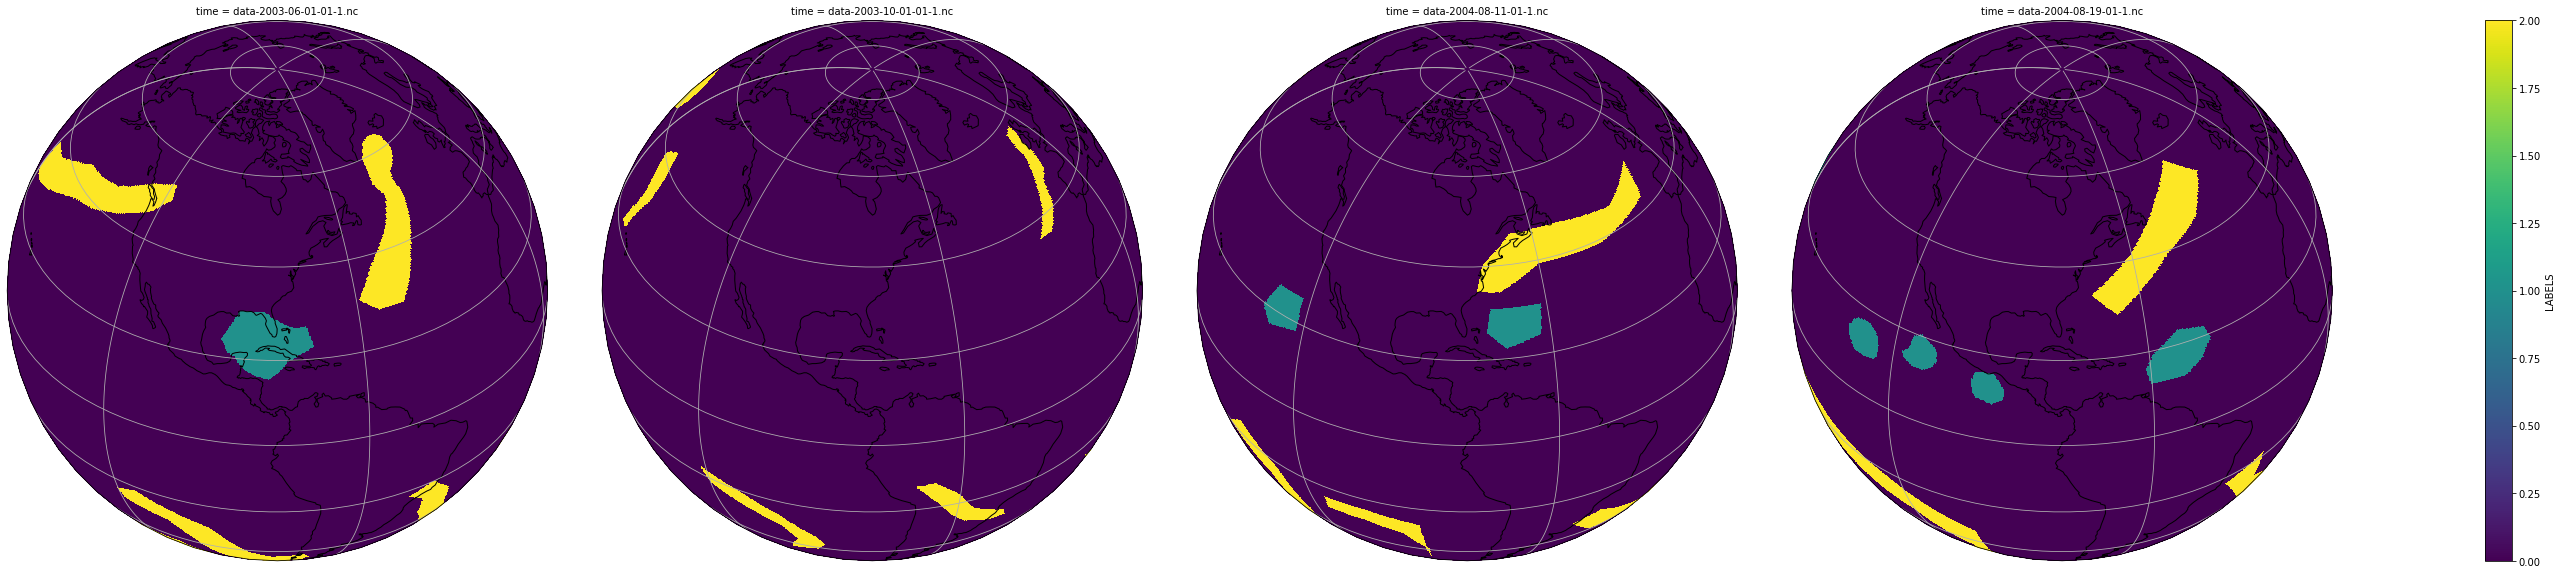

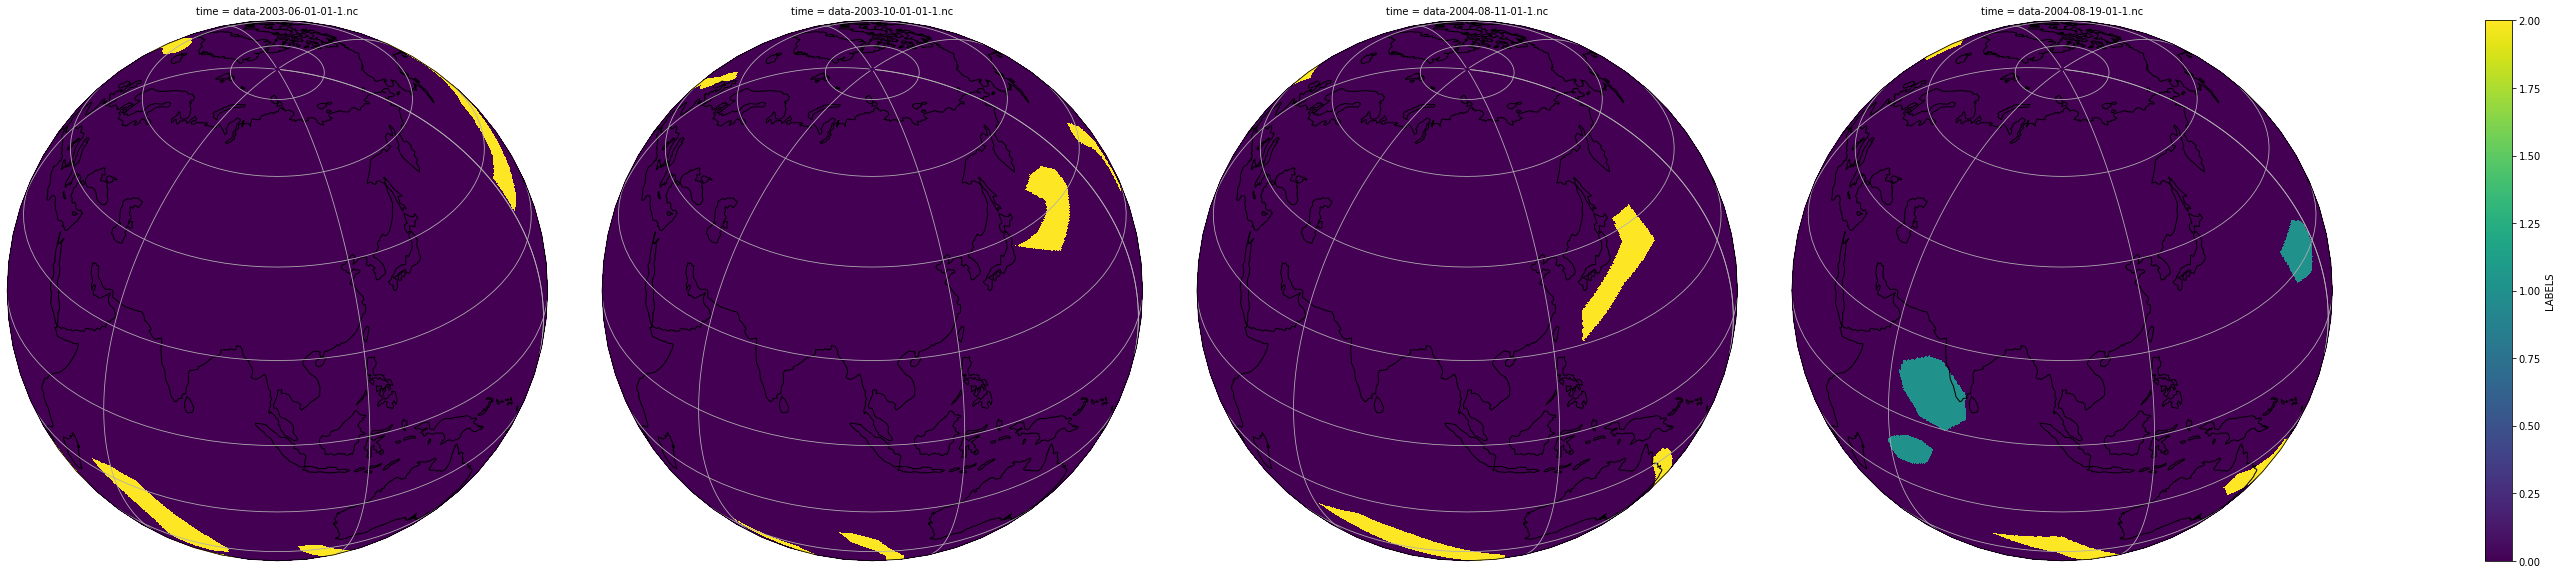

In [ ]:
map_channel(ds, "LABELS")
map_channel(ds, "LABELS", 100)

In [ ]:
ds.groupby("LABELS").count()



<xarray.Dataset>
Dimensions:  (LABELS: 3)
Coordinates:
  * LABELS   (LABELS) int64 0 1 2
Data variables: (12/16)
    TMQ      (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    U850     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    V850     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    UBOT     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    VBOT     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    QREFHT   (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...       ...
    PRECT    (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    TS       (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    TREFHT   (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    Z1000    (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    Z200     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    ZBOT     (LABELS) int64 dask.array<chunksize=(1,), meta=np.ndarray>

# Total precipitable water (TMQ)

Description: total (vertically integrated) precipitable water


In [ ]:
map_channel(ds, "TMQ")
map_channel(ds, "TMQ", 100)

Output hidden; open in https://colab.research.google.com to view.

# Zonal winds at 850 hPa (U850)



In [ ]:
map_channel(ds, "U850")
map_channel(ds, "U850", 100)

Output hidden; open in https://colab.research.google.com to view.

# Meridional winds at 850 hPa (V850)

In [ ]:
map_channel(ds, "V850")
map_channel(ds, "V850", 100)

Output hidden; open in https://colab.research.google.com to view.

# Surface zonal winds (UBOT)

In [ ]:
map_channel(ds, "UBOT")
map_channel(ds, "UBOT", 100)

Output hidden; open in https://colab.research.google.com to view.

# Surface meridional winds (VBOT)

In [ ]:
map_channel(ds, "VBOT")
map_channel(ds, "VBOT", 100)

Output hidden; open in https://colab.research.google.com to view.

# Reference height humidity (QREFHT)

In [ ]:
map_channel(ds, "VBOT")
map_channel(ds, "VBOT", 100)

Output hidden; open in https://colab.research.google.com to view.

# Surface pressure (PS)

In [ ]:
map_channel(ds, "PS")
map_channel(ds, "PS", 100)

Output hidden; open in https://colab.research.google.com to view.

# Sea-level pressure (PSL)

In [ ]:
map_channel(ds, "PSL")
map_channel(ds, "PSL", 100)

Output hidden; open in https://colab.research.google.com to view.

# T200

In [ ]:
map_channel(ds, "T200")
map_channel(ds, "T200", 100)

Output hidden; open in https://colab.research.google.com to view.

#T500

In [ ]:
map_channel(ds, "T500")
map_channel(ds, "T500", 100)

Output hidden; open in https://colab.research.google.com to view.

# PRECT

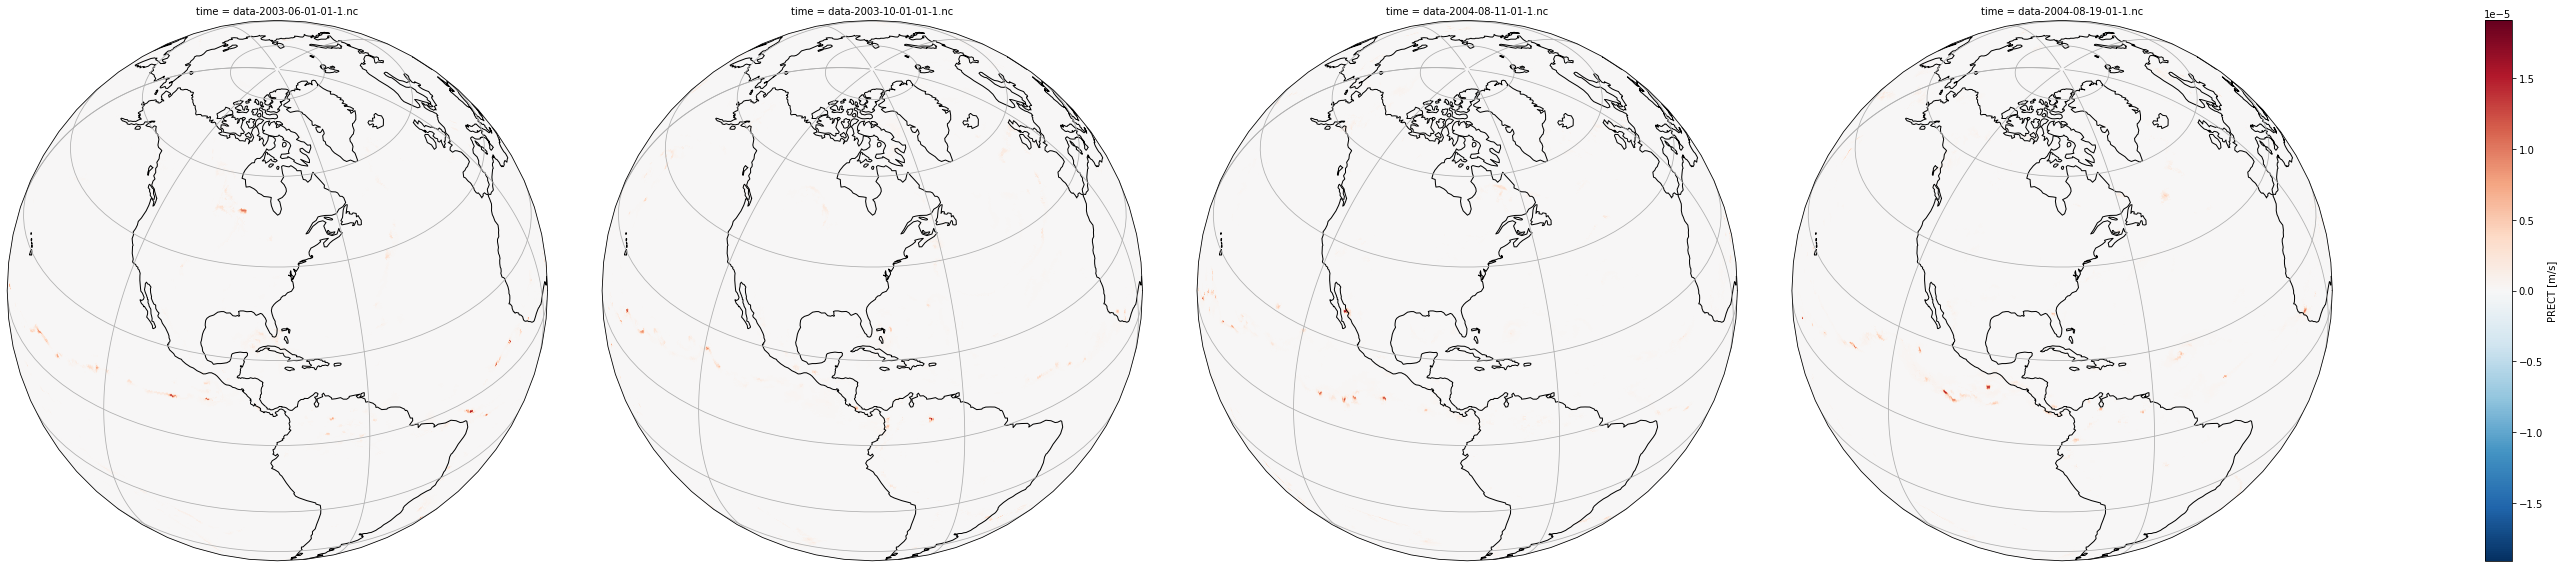

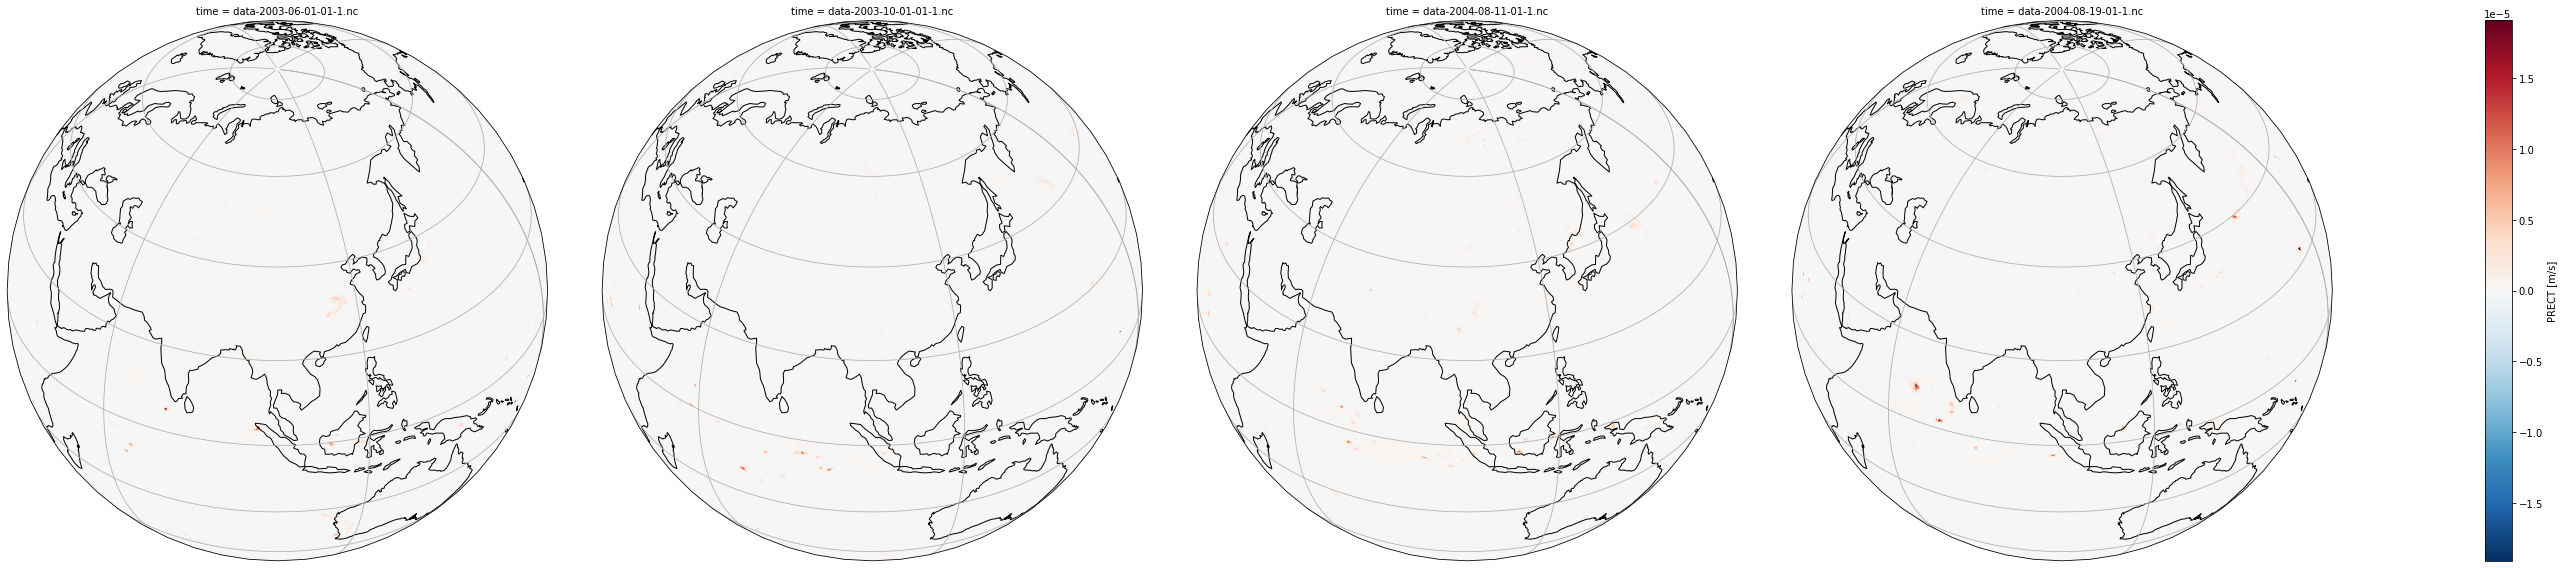

In [ ]:
map_channel(ds, "PRECT")
map_channel(ds, "PRECT", 100)

# TS

In [ ]:
map_channel(ds, "TS")
map_channel(ds, "TS", 100)

Output hidden; open in https://colab.research.google.com to view.

# TREFHT

In [ ]:
map_channel(ds, "TREFHT")
map_channel(ds, "TREFHT", 100)

Output hidden; open in https://colab.research.google.com to view.

# Z1000

In [ ]:
map_channel(ds, "Z1000")
map_channel(ds, "Z1000", 100)

Output hidden; open in https://colab.research.google.com to view.

# Z200

In [ ]:
map_channel(ds, "Z200")
map_channel(ds, "Z200", 100)

Output hidden; open in https://colab.research.google.com to view.

# ZBOT

In [ ]:
map_channel(ds, "ZBOT")
map_channel(ds, "ZBOT", 100)

Output hidden; open in https://colab.research.google.com to view.